**Автор: Анна Смелова**

## Решение домашнего задания к уроку “Производная функции нескольких переменных”

In [1]:
import sympy as sym
import warnings

import numpy as np
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from pylab import *

warnings.filterwarnings('ignore')
%matplotlib inline

x, y = sym.symbols('x y', real=True)
dx = sym.Symbol('dx')
dy = sym.Symbol('dy')

### 1. Задание
#### Найти область определения функции:

$$z=\sqrt{1-x^3}+\ln{(y^2-1)}$$

**<font color='darkblue'>Решение:</font>**<br>
$dom(z)=
\begin{cases}
   1-x^3\geq0, 
   \\
   y^2-1>0.
\end{cases} 
\Rightarrow 
\begin{cases}
   (x-1)(x^2+x+1)\leq0, 
   \\
   (y-1)(y+1)>0.
\end{cases}
\Rightarrow 
\begin{cases}
   (x-1)\leq0, [(x^2+x+1)>0\forall x]
   \\
   \left[ 
      \begin{gathered} 
        y<-1, \\ 
        y>1. \\ 
      \end{gathered} 
   \right.\\
\end{cases}
\Rightarrow 
\begin{cases}
   x\leq1,
   \\
   \left[ 
      \begin{gathered} 
        y<-1, \\ 
        y>1. \\ 
      \end{gathered} 
   \right.\\
\end{cases}
 $

**<font color='darkblue'>Ответ: $x\in(-\infty,1]$, $y\in(-\infty,-1)\cup(1,\infty)$</font>**

### 2. Задание
#### Найти производные 1-го порядка функции:

$$z=(1+\frac{\ln{x}}{\ln{y}})^3$$

**<font color='darkblue'>Аналитическое решение:</font>**<br>
$z=(1+\frac{\ln{x}}{\ln{y}})^3=(\frac{\ln{y}+\ln{x}}{\ln{y}})^3=(\frac{\ln{(xy)}}{\ln{y}})^3$<br><br>
$\frac{\partial z}{\partial x}=3(\frac{\ln{(xy)}}{\ln{y}})^2\frac{1}{\ln{y}}\frac{1}{xy}y=\frac{3\ln^2{(xy)}}{x\ln^3{y}}$<br><br>
$\frac{\partial z}{\partial y}=3(\frac{\ln{(xy)}}{\ln{y}})^2\frac{(\ln{(xy)})'\ln{y}-\ln{(xy)(\ln{y})'}}{\ln^2{y}}=3\frac{\ln^2{(xy)}}{\ln^2{y}}\frac{\frac{x\ln{y}}{xy}-\frac{\ln{(xy)}}{y}}{\ln^2{y}}=3\frac{\ln^2{(xy)}}{\ln^2{y}}\frac{\ln{\frac{y}{xy}}}{y\ln^2{y}}=3\frac{\ln^2{(xy)}\ln{\frac{1}{x}}}{y\ln^4{y}}=\frac{-3\ln{x}\ln^2{(xy)}}{y\ln^4{y}}$<br><br>

In [2]:
# Численное решение
z = (1+sym.ln(x)/sym.ln(y))**3
dzx = sym.diff(z, x)
dzy = sym.diff(z, y)
print(f"z'_x={sym.simplify(dzx)}")
print(f"z'_y={sym.simplify(dzy)}")

z'_x=3*(log(x) + log(y))**2/(x*log(y)**3)
z'_y=-3*(log(x) + log(y))**2*log(x)/(y*log(y)**4)


**<font color='darkblue'>Ответ: $\frac{\partial z}{\partial x}=\frac{3\ln^2{(xy)}}{x\ln^3{y}}$, $\frac{\partial z}{\partial y}=\frac{-3\ln{x}\ln^2{(xy)}}{y\ln^4{y}}$</font>**

### 3. Задание
#### Найти полный дифференциал функции в точке (1;1):

$$z=\sqrt{2xy+\cos{\frac{x}{y}}}$$

**<font color='darkblue'>Аналитическое решение:</font>**<br>
$dz=\frac{\partial z}{\partial x}dx+\frac{\partial z}{\partial y}dy$<br><br>
$\frac{\partial z}{\partial x}=\frac{1}{2}(2xy+\cos{\frac{x}{y}})^{-\frac{1}{2}}(2y-\frac{1}{y}\sin{\frac{x}{y}})=\frac{2y^2-\sin{\frac{x}{y}}}{2y\sqrt{2xy+\cos{\frac{x}{y}}}}$<br><br>
$\frac{\partial z}{\partial y}=\frac{1}{2}(2xy+\cos{\frac{x}{y}})^{-\frac{1}{2}}(2x-\sin{\frac{x}{y}}(-\frac{x}{y^2}))=\frac{2xy^2+x\sin{\frac{x}{y}}}{2y^2\sqrt{2xy+\cos{\frac{x}{y}}}}$<br><br>
$dz=\frac{2y^2-\sin{\frac{x}{y}}}{2y\sqrt{2xy+\cos{\frac{x}{y}}}}dx+\frac{2xy^2+x\sin{\frac{x}{y}}}{2y^2\sqrt{2xy+\cos{\frac{x}{y}}}}dy=\frac{1}{2y\sqrt{2xy+\cos{\frac{x}{y}}}}((2y^2-\sin{\frac{x}{y}})dx+(2xy+\frac{x}{y}\sin{\frac{x}{y}})dy)$<br><br>
$dz(1;1)=\frac{1}{2\sqrt{2+\cos{1}}}((2-\sin{1})dx+(2+\sin{1})dy)$

In [3]:
# Численное решение
z = sym.sqrt(2*x*y+sym.cos(x/y))
dzx = sym.diff(z, x)
dzy = sym.diff(z, y)
print(f"z'_x={sym.simplify(dzx)}")
print(f"z'_y={sym.simplify(dzy)}")
print(f"dz={sym.simplify(dzx*dx+dzy*dy)}")

z'_x=(y**2 - sin(x/y)/2)/(y*sqrt(2*x*y + cos(x/y)))
z'_y=x*(2*y**2 + sin(x/y))/(2*y**2*sqrt(2*x*y + cos(x/y)))
dz=(dx*y*(2*y**2 - sin(x/y)) + dy*x*(2*y**2 + sin(x/y)))/(2*y**2*sqrt(2*x*y + cos(x/y)))


**<font color='darkblue'>Ответ: $dz(1;1)=\frac{1}{2\sqrt{2+\cos{1}}}((2-\sin{1})dx+(2+\sin{1})dy)$</font>**

### 4. Задание
#### Исследовать на экстремум функцию:

$$z=x^2+xy+y^2-6x-9y$$

**<font color='darkblue'>Решение:</font>**<br>
**Необходимое условие:**<br><br>
$\begin{cases}
   \frac{\partial z}{\partial x}=2x+y-6=0, 
   \\
   \frac{\partial z}{\partial y}=x+2y-9=0.
\end{cases}
\Rightarrow
\begin{cases}
   y=6-2x, 
   \\
   2y=9-x.
\end{cases}
\Rightarrow
\begin{cases}
   y=6-2x, 
   \\
   12-4x=9-x.
\end{cases}
\Rightarrow
\begin{cases}
   x=1, 
   \\
   y=4.
\end{cases}
\Rightarrow M(1,4)$ - критическая точка<br><br>
**Достаточное условие:**<br><br>
$\Delta=
\begin{vmatrix}
  \frac{\partial^2 z}{\partial x^2} \frac{\partial^2 z}{\partial x \partial y}\\
  \frac{\partial^2 z}{\partial y \partial x} \frac{\partial^2 z}{\partial y^2}
\end{vmatrix}=
\begin{vmatrix}
  2 \quad 1\\
  1 \quad 2
\end{vmatrix}=4-1=3>0
\Rightarrow M
$-точка экстремума<br><br>
$\frac{\partial^2 z}{\partial x^2}=2>0 \Rightarrow M(1,4)$-точка минимума

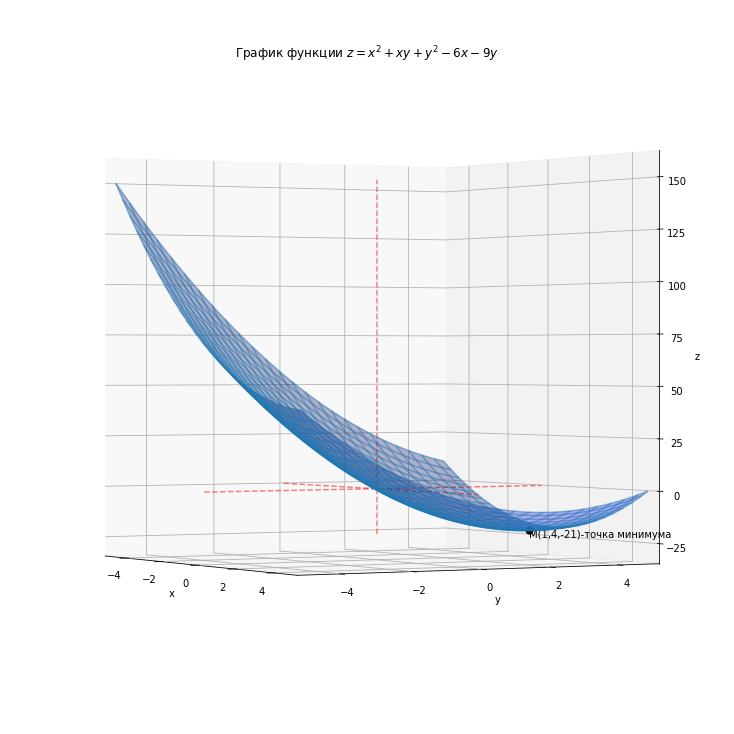

In [4]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

x_p = np.linspace(-5, 5, 100) 
y_p = np.linspace(-5, 5, 100)
X_p, Y_p = np.meshgrid(x_p, y_p)
Z_p = X_p**2 + X_p*Y_p + Y_p**2 - 6*X_p - 9*Y_p

ax.plot_surface(X_p, Y_p, Z_p, alpha=0.3, color='b', shade=True)
ax.plot_wireframe(X_p, Y_p, Z_p, alpha=0.5, rstride=4, cstride=4)
ax.view_init(0, -30)

# Отмечаем оси координат
ax.plot((-5,5), (0,0), (0,0), alpha=0.5, c='r', linestyle='--')
ax.plot((0,0), (-5,5), (0,0), alpha=0.5, c='r', linestyle='--')
ax.plot((0,0), (0,0), (-22,150), alpha=0.5, c='r', linestyle='--')

# Отмечаем критическую точку M(1,4,-21)
ax.scatter(1,4,-21,'z',50,'black')
ax.text(1,4,-25,'M(1,4,-21)-точка минимума')
    
# Границы графика
ax.set_xlim((-5,5))
ax.set_ylim((-5,5))
#ax.set_zlim((-22,100))

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title(f'График функции $z=x^2+xy+y^2-6x-9y$')
plt.show()

**<font color='darkblue'>Ответ: $M(1,4)$-точка минимума функции</font>**